# Assignment 9 - Data Analytics II

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
# Features Explanation

# User ID: Unique identifier for each user.
# Gender: Gender of the user (e.g., Male, Female).
# Age: Age of the user.
# Estimated Salary: Estimated annual salary of the user.
# Purchased: Purchased or not

df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
print("Numeric features : ", df.select_dtypes(include=['int64']).columns)
print("Nominal features : ", df.select_dtypes(exclude=['int64']).columns)

Numeric features :  Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Nominal features :  Index(['Gender'], dtype='object')


In [8]:
df["Gender"] = df["Gender"].astype("category").cat.codes
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [9]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [10]:
df['EstimatedSalary'] = (df['EstimatedSalary']-df['EstimatedSalary'].mean())/df['EstimatedSalary'].std()
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,4.000000e+02,400.000000
mean,1.569154e+07,0.490000,37.655000,3.552714e-17,0.357500
std,7.165832e+04,0.500526,10.482877,1.000000e+00,0.479864
min,1.556669e+07,0.000000,18.000000,-1.605495e+00,0.000000
25%,1.562676e+07,0.000000,29.750000,-7.843075e-01,0.000000
50%,1.569434e+07,0.000000,37.000000,7.551993e-03,0.000000
75%,1.575036e+07,1.000000,46.000000,5.354583e-01,1.000000
max,1.581524e+07,1.000000,60.000000,2.353802e+00,1.000000


In [11]:
df.corr(method="pearson")["Purchased"]

User ID            0.007120
Gender            -0.042469
Age                0.622454
EstimatedSalary    0.362083
Purchased          1.000000
Name: Purchased, dtype: float64

In [12]:
X = df.drop(["User ID", "Purchased"],axis=1)
Y = df["Purchased"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [15]:
Y_pred = lr.predict(X_test)
Y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [16]:
lr.score(X_test, Y_test)*100

88.75

In [17]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(Y_test, Y_pred)

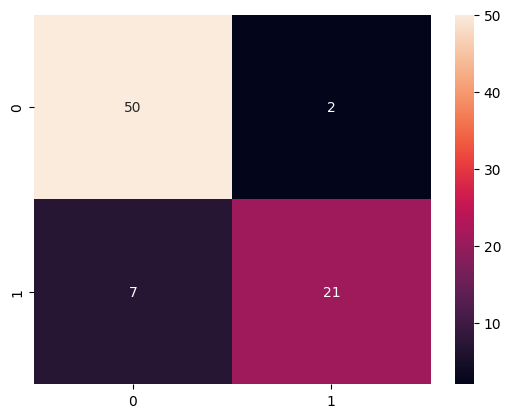

In [18]:
sns.heatmap(cfm, annot=True)
plt.show()

In [19]:
TN, FP, FN, TP = cfm.ravel()
Precision_Score = TP/(TP+FP)
Recall_Score = TP/(TP+FN)
F1_Score = (2*Precision_Score*Recall_Score)/(Precision_Score+Recall_Score)
Error_Rate = (FP+FN)/(TP+FP+TN+FN)

In [20]:
print("True negative : ", TN)
print("False positive : ", FP)
print("False negative : ", FN)
print("True positive : ", TP)
print("Precision : ", Precision_Score*100)
print("Recall : ", Recall_Score*100)
print("F1 Score : ", F1_Score*100)
print("Error Rate : ", Error_Rate*100)

True negative :  50
False positive :  2
False negative :  7
True positive :  21
Precision :  91.30434782608695
Recall :  75.0
F1 Score :  82.35294117647058
Error Rate :  11.25
